In [19]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [20]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [21]:
#Generate a random number and create a data set by giving required input parameters
random_number = random.randint(1,10000)
X, y = make_circles(n_samples=500, factor = 0.5, noise = 0.03, random_state=random_number)

In [22]:
outer = y == 0
inner = y == 1

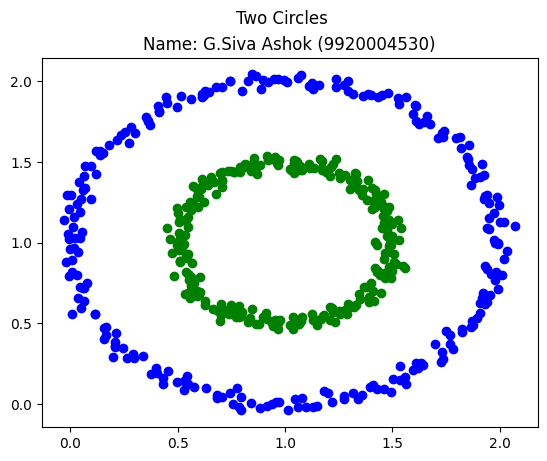

In [30]:
#Plot the circles using Matplotlib.pyplot
plt.title("Name: G.Siva Ashok (9920004530)")
plt.suptitle("Two Circles")
plt.plot(X[outer, 0], X[outer, 1], "bo")
plt.plot(X[inner, 0], X[inner, 1], "go")
plt.show()

In [31]:
#split data to train and test
X += 1
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = random_number)

In [32]:
#Use sigmoid activation function
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [33]:
#Declare hidden neurons and no of epochs and learning rate
n_hidden = 50
n_epochs = 1000
learning_rate = 0.5

In [34]:
#Generate the random hidden and output weights
weights_hidden = np.random.normal(0.0, size =(X_train.shape[1], n_hidden))
weights_output = np.random.normal(0.0, size =(n_hidden))

In [35]:
#for every epoch find error and update the weights and 'find loss and accuracy' for every 100th epoch
print('Name : G.Siva Ashok (9920004530)')
for e in range(n_epochs):
    del_w_hidden = np.zeros(weights_hidden.shape)
    del_w_output = np.zeros(weights_output.shape)
    for x_, y_ in zip(X_train, y_train):
        hidden_input = np.dot(x_, weights_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.dot(hidden_output, weights_output))
        
        error = y_ - output
        output_error = error * output * (1-output)
        hidden_error = np.dot(output_error, weights_output) * hidden_output * (1-hidden_output)
        del_w_output += output_error * hidden_output
        del_w_hidden += hidden_error * x_[:,None]
        
    weights_hidden += learning_rate * del_w_hidden / X_train.shape[0]
    weights_output += learning_rate * del_w_output / X_train.shape[0]
    
    if e % 100 == 0:
        hidden_output = sigmoid(np.dot(X_val, weights_hidden))
        out = sigmoid(np.dot(hidden_output, weights_output))
        loss = np.mean((out - y_val) ** 2)
        predictions = out > 0.5
        accuracy = np.mean(predictions == y_val)
        print("Epoch: ","{:4}".format(e),"; Validation Loss:",'{:6}'.format(loss.round(4)),"; Validation Accuracy: ","{:6}".format(accuracy.round(4)))


Name : G.Siva Ashok (9920004530)
Epoch:     0 ; Validation Loss: 0.5197 ; Validation Accuracy:    0.48
Epoch:   100 ; Validation Loss: 0.5196 ; Validation Accuracy:    0.48
Epoch:   200 ; Validation Loss: 0.5195 ; Validation Accuracy:    0.48
Epoch:   300 ; Validation Loss: 0.5193 ; Validation Accuracy:    0.48
Epoch:   400 ; Validation Loss: 0.5188 ; Validation Accuracy:    0.48
Epoch:   500 ; Validation Loss: 0.5164 ; Validation Accuracy:    0.48
Epoch:   600 ; Validation Loss: 0.2631 ; Validation Accuracy:    0.25
Epoch:   700 ; Validation Loss: 0.2389 ; Validation Accuracy:     0.7
Epoch:   800 ; Validation Loss: 0.2221 ; Validation Accuracy:    0.83
Epoch:   900 ; Validation Loss: 0.2094 ; Validation Accuracy:    0.84
